# Статистический анализ данных

Цель работы заключается в исследовании данных и проверки гипотез для сервиса аренды самокатов. Для этого предоставленно три файла с информацией о пользователях, поездках и подписках.

План:
- Загрузка данных
- Предобработка 
- Исследование данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Составление вывода

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
user_data = pd.read_csv('/datasets/users_go.csv')
display(user_data.info())
user_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
ride_data = pd.read_csv('/datasets/rides_go.csv')
display(ride_data.info())
ride_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
sub_data = pd.read_csv('/datasets/subscriptions_go.csv')
display(sub_data.info())
sub_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-info">
Вывод: В полученных данных можно заметить, что в датасете подписок все две строки(виды подписки). БОльшее кол-во строк содержалось в датасете поездок. Все данные можно объединить. Дата в датасете имеет тип данных object, поэтому следует ее заменить на datetime.
    </div> 

#### Шаг 2. Предобработка данных

In [5]:
ride_data['date'] = pd.to_datetime(ride_data['date'], format='%Y-%m-%d')
display(ride_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

In [6]:
display(ride_data['date'].max())
display(ride_data['date'].min())

Timestamp('2021-12-30 00:00:00')

Timestamp('2021-01-01 00:00:00')

Полученные данные содержат информацию за 1 год.

In [7]:
ride_data['month'] = ride_data['date'].dt.month
ride_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
ride_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [9]:
user_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
sub_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [11]:
ride_data.duplicated().sum()

0

In [12]:
user_data.duplicated().sum()

31

In [13]:
user_data = user_data.drop_duplicates().reset_index(drop=True)
user_data.duplicated().sum()

0

In [14]:
sub_data.duplicated().sum()

0

<div class="alert alert-info">
Вывод: В полученных данных не встречаются пропуски. Были удалены дупликаты из датасета пользователей. В других данных дупликатов не было. Также был приведен столбец date к формату даты и времени.
    </div> 

#### Шаг 3. Исследовательский анализ данных

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


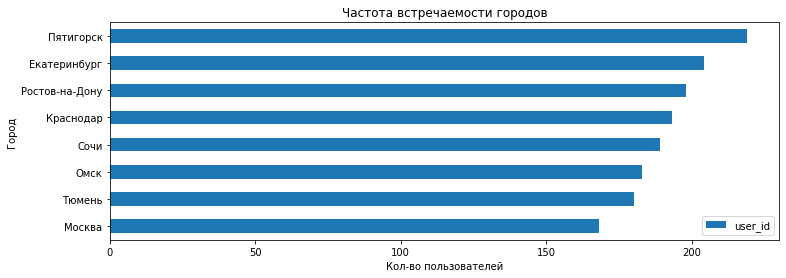

In [15]:
city_info = user_data.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id')
display(city_info.head(10))
city_info.plot(kind='barh', figsize=(12, 4));
plt.title('Частота встречаемости городов')
plt.xlabel('Кол-во пользователей');
plt.ylabel('Город');

Чаще всех встречается Пятигорск, а вот реже всех - Москва.

,user_id
subscription_type,
free,835
ultra,699


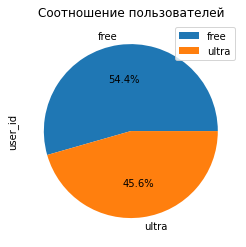

In [16]:
ratio = user_data.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
display(ratio)

ratio.plot(y='user_id', kind='pie', autopct='%1.1f%%');
plt.title('Соотношение пользователей');


Кол-во людей с подпиской немного меньше, чем пользователей без.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

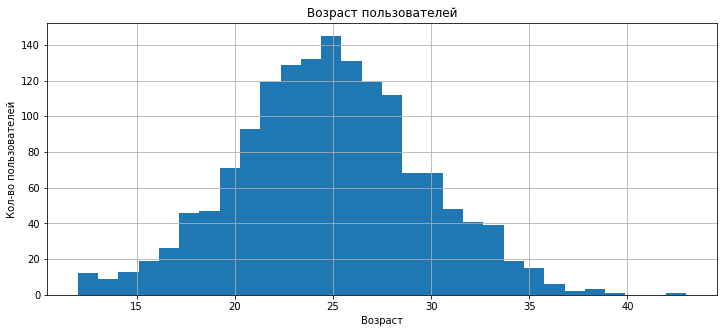

In [17]:
display(user_data['age'].describe())
user_data['age'].hist(figsize=(12, 5), bins=30);
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей');

В основном пользуются самокатами люди от 15 до 35 лет. Средний возраст 25 лет.

In [18]:
user_ride_data = user_data.merge(ride_data, on='user_id')
user_ride_data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

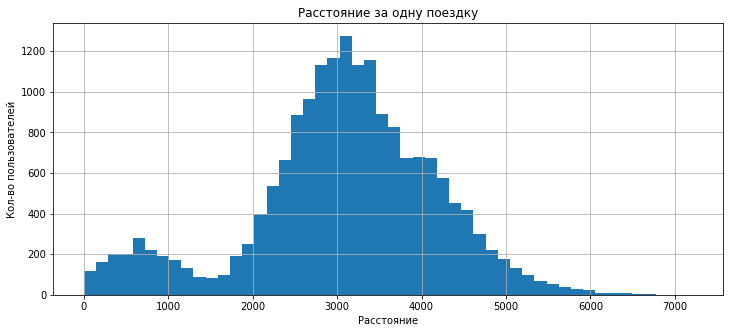

In [19]:
display(user_ride_data['distance'].describe())
user_ride_data['distance'].hist(figsize=(12, 5), bins = 50);
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Кол-во пользователей');

В основном пользователи проезжают расстояние до 5км. Среднее расстояние 3070м.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

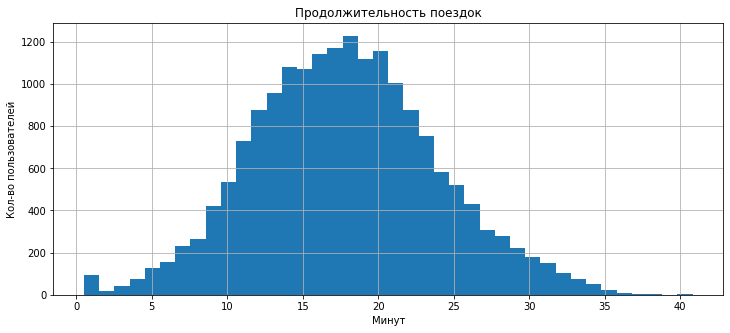

In [20]:
display(user_ride_data['duration'].describe())
user_ride_data['duration'].hist(figsize=(12, 5), bins = 40);
plt.title('Продолжительность поездок')
plt.xlabel('Минут')
plt.ylabel('Кол-во пользователей');

<div class="alert alert-info">

Вывод: Было проведенно небольшое исследование, из которого можно узнать, что больше всего пользуются самокатами в Пятигорске, Екатеринбурге, Ростове-на-Дону; основные пользователи - люди от 15 до 35; 45% пользователей имеют подписку; чаще всего поездки занимают от 5 до 30 минут на расстояние до 5км.
    
</div> 

#### Шаг 4. Объединение данных

In [21]:
data = user_ride_data.merge(sub_data, on='subscription_type')
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [22]:
display(len(data))
data.isna().sum()

18068

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Кол-во записей не изменилось. Пропуски не обнаружены.

In [23]:
free_data = data.query('subscription_type == "free"')
free_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [24]:
ultra_data = data.query('subscription_type == "ultra"')
display(ultra_data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [25]:
display(ultra_data['distance'].describe())
display(free_data['distance'].describe())

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

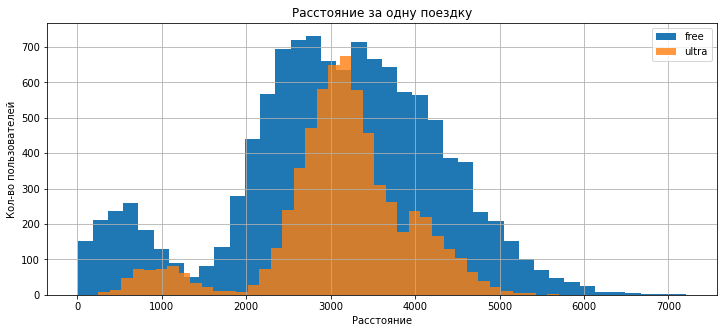

In [26]:
free_data['distance'].hist(figsize=(12, 5), bins=40, label='free');
ultra_data['distance'].hist(figsize=(12, 5), bins=40, label='ultra', alpha=0.8);
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Кол-во пользователей')
plt.legend(loc='upper right')
plt.show();

In [27]:
display(ultra_data['duration'].describe())
display(free_data['duration'].describe())

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

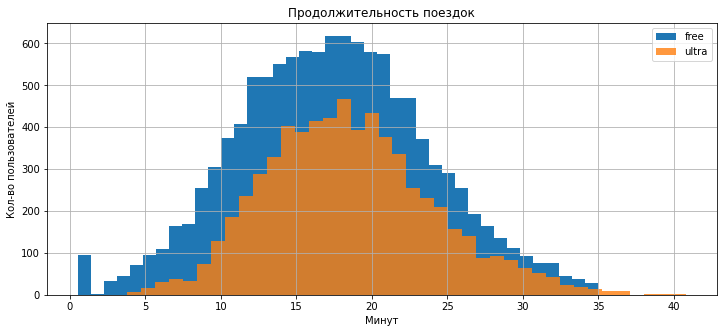

In [28]:
free_data['duration'].hist(figsize=(12, 5), bins=40, label='free');
ultra_data['duration'].hist(figsize=(12, 5), bins=40, label='ultra', alpha=0.8);
plt.title('Продолжительность поездок')
plt.xlabel('Минут')
plt.ylabel('Кол-во пользователей');
plt.legend(loc='upper right')
plt.show();

<div class="alert alert-info">

Вывод: По графикам можно заметить, что больше поездок совершают люди без подписки. 
- Данные по дистанции представленны до 7км. Пользователи с подпиской имеют меньше диапазон расстояния, но короткие поездки чаще совершают пользователи без подписки. Для пользователей с подпиской среднее значение 3115м и медиана 3148м, а без подписки среднее 3045м и медиана 3134м.
- Данные по длительности представленны до 40 минут. Разброс у пользователей с подпиской чуть больше. Для пользователей с подпиской среднее значение и медиана 19 мин, а без подписки среднее и медиана 17 минут.
- Графики не сильно отличаются друг от друга.


#### Шаг 5. Подсчёт выручки

In [29]:
data['duration'] = np.ceil(data['duration']).astype(int)
data_stat = (data.groupby(['user_id', 'month'])
             .agg({'duration':'sum', 'distance':['sum', 'count'],
                   'subscription_type':'first'}))
data_stat.columns = ['duration', 'distance', 'count', 'subscription_type']
data_stat.head(10)

duration      distance  count subscription_type
user_id month                                                 
1       1            42   7027.511294      2             ultra
        4             7    754.159807      1             ultra
        8            46   6723.470560      2             ultra
        10           32   5809.911100      2             ultra
        11           56   7003.499363      3             ultra
        12           28   6751.629942      2             ultra
2       3            63  10187.723006      3             ultra
        4            40   6164.381824      2             ultra
        6            14   3255.338202      1             ultra
        7            48   6780.722964      2             ultra

In [30]:
def income_count(row):
    if row['subscription_type'] == 'ultra':
        return row['duration'] * 6 + 199
    else:
        return row['duration'] * 8 + row['count'] * 50
 
data_stat['income'] = data_stat.apply(income_count, axis=1)
data_stat.head(10)

duration      distance  count subscription_type  income
user_id month                                                         
1       1            42   7027.511294      2             ultra     451
        4             7    754.159807      1             ultra     241
        8            46   6723.470560      2             ultra     475
        10           32   5809.911100      2             ultra     391
        11           56   7003.499363      3             ultra     535
        12           28   6751.629942      2             ultra     367
2       3            63  10187.723006      3             ultra     577
        4            40   6164.381824      2             ultra     439
        6            14   3255.338202      1             ultra     283
        7            48   6780.722964      2             ultra     487

#### Шаг 6. Проверка гипотез

Нулевая гипотеза: длительность поездок у пользователей с подпиской = длительность поездок у пользователей без подписки.
Альтернативная гипотеза: длительность поездок у пользователей с подпиской > длительность поездок у пользователей без подписки.

In [31]:
display(ultra_data['duration'].mean())
display(free_data['duration'].mean())

18.54198516280583

17.39090929866399

In [32]:
alpha = 0.05
dur_results = st.ttest_ind(ultra_data['duration'], free_data['duration'], alternative='greater')
print('p-value:', dur_results.pvalue)
if dur_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


<div class="alert alert-info">

Вывод: Нулевая гипотеза отвергнута в пользу альтернативной. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
</div> 

Нулевая гипотеза: среднее расстояние пользователя с подпиской = 3130.
Альтернативная гипотеза: выходит ли за предел (среднее расстояние пользователя с подпиской > 3130).

In [33]:
ultra_data['distance'].mean()

3115.4453880370247

In [34]:
one_ride = 3130
dist_results = st.ttest_1samp(ultra_data['distance'], one_ride, alternative='greater')
print('p-value:', dist_results.pvalue)
if dist_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


<div class="alert alert-info">

Вывод: Не получилось отвергнуть нулевую гипотезу. Есть основания говорить, что среднее расстояние в пути пользователя с подпиской не превышает 3130м.
</div>  

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам = выручка от пользователей без подписки.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам > выручка от пользователей без подписки.

In [35]:
ultra_samp = data_stat.query('subscription_type == "ultra"')['income']
free_samp = data_stat.query('subscription_type == "free"')['income']
income_results = st.ttest_ind(ultra_samp, free_samp, alternative='greater')
print('p-value:', income_results.pvalue)
if income_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-info">

Вывод: Отвергаем нулевую гипотезу в пользу альтернативной. Есть основания говорить, что помесячная выручка от пользователей с подпиской больше.
</div> 

#### Шаг 7. Распределения

<div class="alert alert-info">
<font size="4", color = "black"><b>Вывод</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Нужно было проанализировать данные о некоторых пользователях и проверить несколько гипотез. В полученных данных встретилось небольшое кол-во дупликатов. Пропусков в данных не было. В ходе работы нужно было объединить все датафреймы в один. Выяснилось, что чаще всего пользуются сервисом люди от 15 до 35. Самое большое кол-во пользователей из Пятигорска, Екатеринбурга, Ростова-на-Дону, а вот наименьшее в Москве. На поездку у пользователей в основном уходит от 5 до 30 минут. Люди с подпиской в среднем больше проезжают и проводят времени в поездке (3115м, 19 мин), чем люди без подписки (3045м, 17 мин). Были проверены несколько гипотез, благодаря которым можно сделать вывод, что пользователи с подпиской приносят больше денег сервису, больше проводят времени в поездке. Также можно сказать, что пользователи с подпиской проезжают в среднем расстояние не выходящее за пределы оптимального износа самоката (3130м).